In [1]:
import random
import matplotlib.pyplot as plt

## 1 Generate the length of each comment based on the normal distribution

The size of the data set to be generated (default is 1200, each type is 200)

In [61]:
wantedSize = 1200

In [62]:
randCount = []
for i in range(int(wantedSize)):
    # 生成范围在 0~30 的、服从正态分布的随机数
    randCount.append(int(random.gauss(15, 5)))

In [63]:
randCount[:10]

[25, 16, 20, 18, 6, 21, 9, 16, 22, 14]

In [64]:
count = {}

for i in range(len(randCount)):
    # 处理 randCount[i] < 1 的情况
    if randCount[i] < 1:
        randCount[i] = 1
    # 处理 randCount[i] > 30 的情况
    if randCount[i] > 30:
        randCount[i] = 30
    # 统计次数
    if randCount[i] in count:
        count[randCount[i]] += 1
    else:
        count[randCount[i]] = 1

In [65]:
count

{25: 11,
 16: 110,
 20: 47,
 18: 82,
 6: 27,
 21: 36,
 9: 43,
 22: 28,
 14: 100,
 17: 76,
 12: 87,
 10: 66,
 29: 2,
 11: 75,
 19: 46,
 27: 5,
 26: 11,
 13: 98,
 15: 89,
 2: 6,
 5: 21,
 4: 7,
 28: 2,
 24: 8,
 8: 51,
 23: 20,
 1: 6,
 7: 31,
 3: 9}

The length of each randomly generated Comment is counted as:

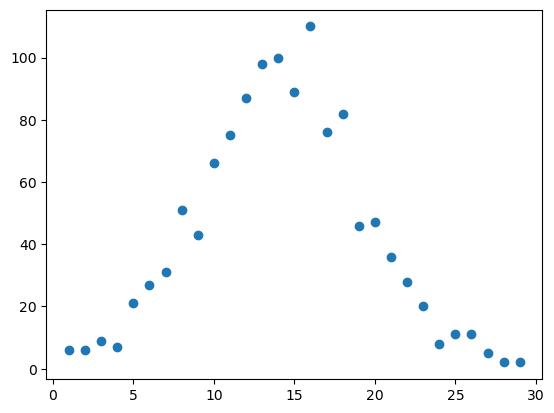

In [66]:
x = count.keys()
y = count.values()

plt.scatter(x, y)
plt.show()

Probability distribution of the categories of Comments based on the observation of LANCET data:
- 6 Content+(CP) 10%，6 Content-(CN) 10%
- 12 Language+(LP) 5%，12 Language-(LN) 55%
- 6 Organization+(OP) 10%，6 Organization-(ON) 10%

In [72]:
# 定义输出的 Dataset（Comments 和 Labels）
comments = []
labels = []
# 设定偏移量（即每种类型的 Comments 之间的差异）
offset = 6
# 评论种类
commentType = ['CP', 'CN', 'LP', 'LN', 'OP', 'ON']

for i, countCurrentEssayComment in enumerate(randCount):
    # 判断当前是第几个 Type
    currentType = int(i // (wantedSize / 6))
    # 存储当前 Essay 的标签
    labels.append(commentType[currentType])
    # 生成当前 Essay 的 Comments
    currentEssayComments = []
    for currentComment in range(countCurrentEssayComment):
        # 根据偏移量 以及 当前的 Type 生成相应的分布
        commentTypeWeights = [0.1, 0.1, 0.05, 0.55, 0.1, 0.1]
        commentTypeWeights[currentType] = round(commentTypeWeights[currentType] + 0.05 * offset, 2)
        for i in range(6):
            if i != currentType:
                commentTypeWeights[i] = round(commentTypeWeights[i] - 0.01 * offset, 2)
        # 根据上面生成的分布 生成一个评论
        randCommentType = random.choices(commentType, commentTypeWeights)[0]

        if randCommentType in ['CP', 'CN', 'OP', 'ON']:
            currentEssayComments.append(randCommentType + str(random.randint(1, 6)))
        elif randCommentType in ['LP', 'LN']:
            currentEssayComments.append(randCommentType + str(random.randint(1, 12)))
    comments.append(' '.join(currentEssayComments))

In [73]:
comments[:10]

['LN7 LN6 CP6 LN10 LN8 CP3 LN8 CP6 LN4 LN3 CN5 CP5 CP4 CP5 CP3 LN12 CP6 LN9 LN7 LN10 LN8 LN3 CP4 LN8 CP4',
 'CP5 LN4 LN2 CP4 CP5 LN11 LN8 CP2 CP4 LN9 CP3 OP3 CP6 LN5 LN4 CP1',
 'LN9 LN12 CP1 CP3 LN1 CP1 LN5 CP5 CP2 CP2 LN9 LN5 CP1 CP5 LN12 CN1 CP3 CN2 CP5 LN2',
 'LN7 CP1 LN12 CP6 LN9 CP2 CP3 CP6 LN2 CP6 CP1 CP5 LN8 CP4 LN2 CP4 LN6 CP1',
 'LN4 ON6 ON3 LN8 LN1 LN7',
 'CP4 ON1 LN2 LN2 LN12 CP6 LN8 LN8 CP1 OP2 CP5 LN3 CN2 CP6 LN10 OP1 CN4 OP5 CP1 CP4 CP2',
 'LN10 CP4 CP1 CP1 OP4 LN3 CP3 LN8 CP4',
 'CP2 LN12 CP2 CP5 CP1 CP1 LN11 CP1 LN5 CP3 LN9 LN12 LN7 LN1 CP1 LN12',
 'LN11 LN9 CP1 LN4 LN1 CP6 LN12 CN2 LN10 CP3 CN5 LN2 CP2 LN8 LN11 CP1 ON6 CP4 OP4 CP3 CP4 CP1',
 'LN9 OP5 LN12 LN10 LN2 LN8 LN10 ON3 LN3 CP6 CP4 LN2 CP4 CP5']

In [74]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [75]:
with open('sixTypes-GeneratedComments.txt', 'w', encoding='utf-8') as f:
    f.writelines('\n'.join(comments))

In [76]:
with open('sixTypes-GeneratedLabels.txt', 'w', encoding='utf-8') as f:
    f.writelines('\n'.join(labels))